# Data preprocessing
In this section, we will preprocess the data to make it ready for training.
Data will be loaded to a pandas dataframe. Then, we will visualize the data to get a better understanding of it.

The required libraries for this section are:
- **pandas** - data manipulation
- **seaborn** - data visualization
- **matplotlib** - data visualization
- **numpy** - numerical operations

Dataset is available in [this](https://www.kaggle.com/datasets/fouadtrad2/evasive-pdf-samples) link.

In [18]:
# Importing libraries for this step
# pandas
%pip install pandas
import pandas as pd

# seaborn
%pip install seaborn
import seaborn as sns

# matplotlib
%pip install matplotlib
import matplotlib.pyplot as plt

# numpy
%pip install numpy
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Representing data in a dataframe
df = pd.read_csv('dataset.csv')
df

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
0,644.326,70,0,1,348,351,128,128,1,1,...,0,1,0,1,0,1,0,1,0,1
1,648.050,68,0,1,348,345,124,124,1,1,...,0,1,0,1,0,0,0,1,0,1
2,696.506,68,0,1,353,353,128,125,1,1,...,0,1,0,1,0,0,0,1,0,1
3,715.926,68,0,0,759,667,250,192,1,1,...,0,1,0,1,0,1,0,1,0,1
4,707.102,70,10,2,388,373,141,138,1,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49.000,1,19,0,9,6,3,2,1,1,...,0,0,0,0,0,0,0,2,0,0
499996,43.000,1,24,0,98,83,3,2,2,2,...,0,0,0,0,0,0,0,0,0,0
499997,83.000,1,0,0,13,11,3,3,1,1,...,0,0,0,0,0,0,0,2,0,0
499998,24.000,1,22,1,13,6,2,3,1,1,...,0,1,0,0,0,0,0,2,0,0


The dataset has 21 columns. They are:
- **pdfsize**: PDF size in Megabytes
- **pages**: number of pages
- **title characters**: number of characters in the title
- **images**: number of images
- **obj**: number of keywords /obj
- **endobj**: number of keywords /endobj
- **stream**: number of keywords /stream
- **endstream**: number of keywords /endstream
- **xref**: number of xref tables
- **trailer**: number of keywords /trailer
- **startxref**: number of keywords /startxref
- **ObjStm**: number of keywords /ObjStm (Object Streams)
- **JS**: number of keywords /JS 
- **OBS_JS**: number of keywords /JS (obfuscated)
- **Javascript**: number of keywords /Javascript 
- **OBS_Javascript**: number of keywords /Javascript (obfuscated)
- **OpenAction**: number of keywords /OpenAction 
- **OBS_OpenAction**: number of keywords /OpenAction (obfuscated)
- **Acroform**: number of keywords /Acroform 
- **OBS_Acroform**: number of keywords /Acroform (obfuscated)
- **class**: classification as benign (0) or malicious (1)

In [20]:
# Print some statistics
df.describe()

,pdfsize,pages,title characters,images,obj,endobj,stream,endstream,xref,trailer,...,ObjStm,JS,OBS_JS,Javascript,OBS_Javascript,OpenAction,OBS_OpenAction,Acroform,OBS_Acroform,class
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,500000.000000,500000.0,500000.000000,500000.0,500000.000000,500000.0,500000.000000,500000.0,500000.0
mean,563.363772,55.101686,5.617004,1.041594,273.595072,273.472290,95.115512,95.331500,0.969714,1.001358,...,0.008572,0.873134,0.0,0.795662,0.0,0.436600,0.0,0.887564,0.0,0.9
std,280.213763,30.233062,6.501397,0.734654,142.333280,142.734185,51.683914,52.094421,0.263349,0.244811,...,0.198168,0.547981,0.0,0.416932,0.0,0.495965,0.0,0.519314,0.0,0.3
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
25%,585.864250,67.000000,0.000000,1.000000,266.000000,266.000000,85.000000,87.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.0,1.0
50%,657.841000,68.000000,4.000000,1.000000,346.000000,345.000000,123.000000,122.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,1.000000,0.0,1.0
75%,708.503250,69.000000,9.000000,2.000000,355.000000,354.000000,126.000000,126.000000,1.000000,1.000000,...,0.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.0
max,1761.042000,287.000000,267.000000,18.000000,760.000000,760.000000,254.000000,254.000000,3.000000,3.000000,...,15.000000,3.000000,0.0,5.000000,0.0,1.000000,0.0,2.000000,0.0,1.0


In [21]:
# See the variety of values in each column
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) <= 10:
        print(f"{column} ({len(unique_values)} values): {unique_values}")
    else:
        print(f"{column} ({len(unique_values)} values)")

pdfsize (206559 values)
pages (194 values)
title characters (102 values)
images (17 values)
obj (643 values)
endobj (673 values)
stream (255 values)
endstream (255 values)
xref (4 values): [1 0 2 3]
trailer (4 values): [1 2 0 3]
startxref (5 values): [1 2 0 3 4]
ObjStm (15 values)
JS (4 values): [1 0 3 2]
OBS_JS (1 values): [0]
Javascript (6 values): [1 0 3 2 4 5]
OBS_Javascript (1 values): [0]
OpenAction (2 values): [1 0]
OBS_OpenAction (1 values): [0]
Acroform (3 values): [1 0 2]
OBS_Acroform (1 values): [0]
class (2 values): [1 0]


In [22]:
# Check for missing values
df.isnull().sum()

pdfsize             0
pages               0
title characters    0
images              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
ObjStm              0
JS                  0
OBS_JS              0
Javascript          0
OBS_Javascript      0
OpenAction          0
OBS_OpenAction      0
Acroform            0
OBS_Acroform        0
class               0
dtype: int64

There are no missing values in the dataset.

In [23]:
# check for duplicates
df.duplicated().sum()

1682

In [24]:
# Drop duplicates
df.drop_duplicates(inplace=True)

#### Data visualization

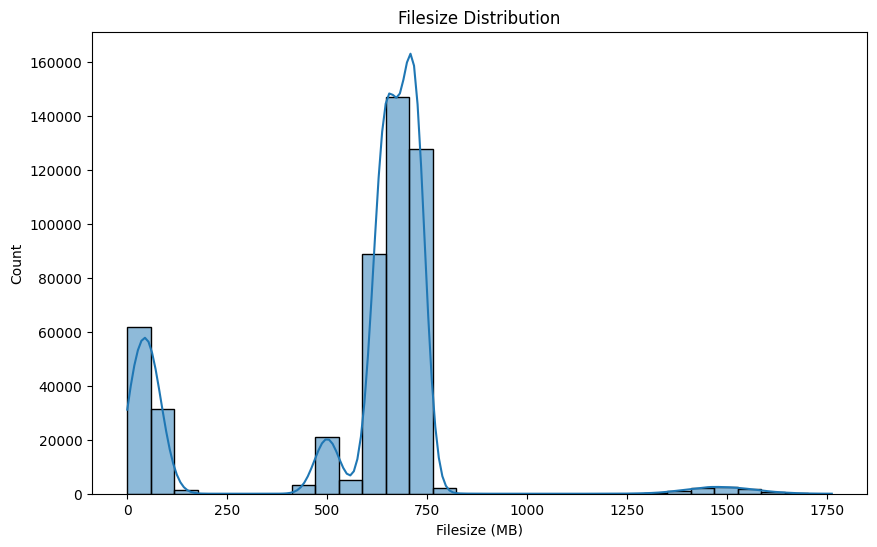

In [33]:
# Filesize visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['pdfsize'], bins=30, kde=True)
plt.title('Filesize Distribution')
plt.xlabel('Filesize (MB)')
plt.ylabel('Count')
plt.show()

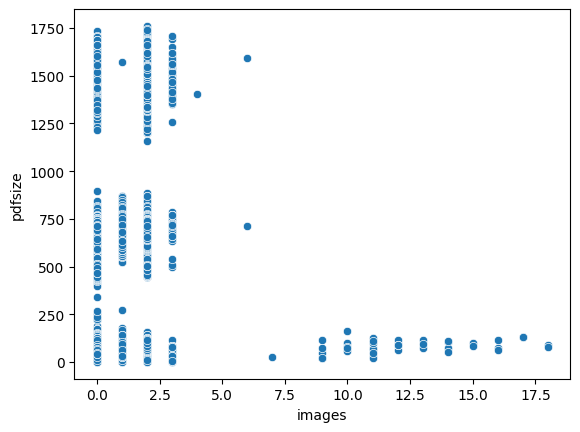

In [25]:
# How does the file size vary with the number of images?
sns.scatterplot(data=df, x='images', y='pdfsize')
plt.show()

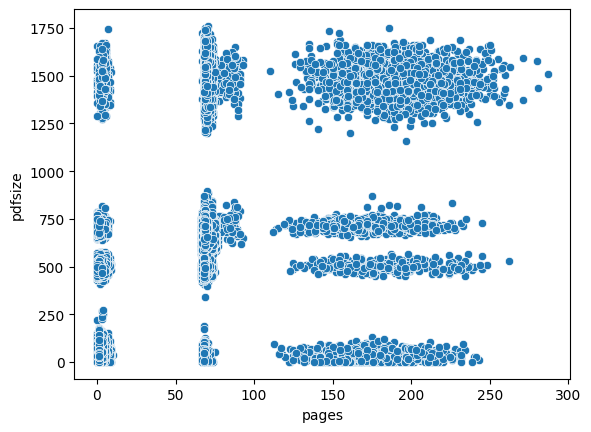

In [26]:
# How does the file size vary with the number of pages?
sns.scatterplot(data=df, x='pages', y='pdfsize')
plt.show()

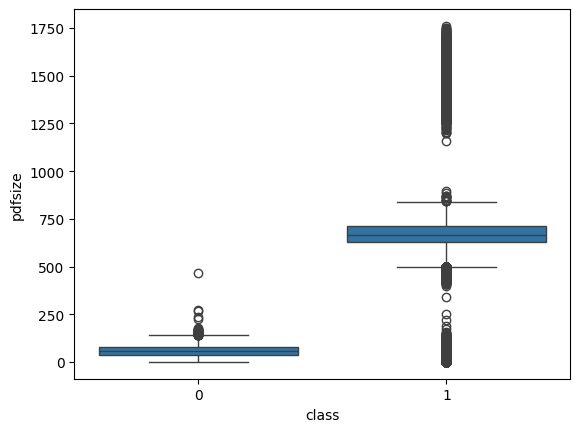

In [27]:
# Does file size affect the classification?
sns.boxplot(x='class', y='pdfsize', data=df)
plt.show()

Larger files tend to be classified as malicius...

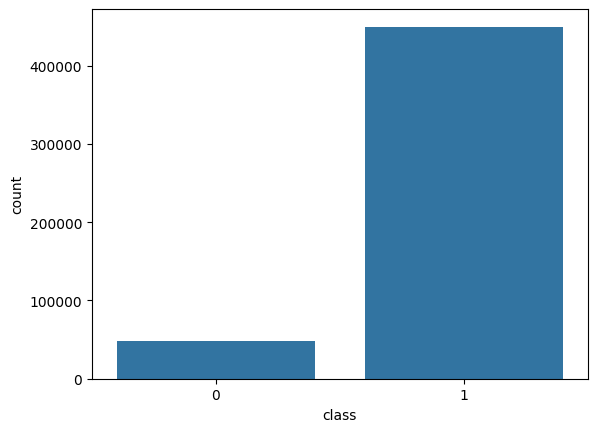

In [30]:
# Number of class=1 and class=0 (target variable) in the dataset
sns.countplot(x='class', data=df)
plt.show()

As we can see, data is imbalanced. We have many more positive samples (90%) than negative samples (10%).

In [167]:
# Import libraries for treating imbalanced data
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.


In [168]:
# Split data into features (x) and target (y)
x, y = df.drop('class', axis=1), df['class']


In [169]:
# Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the data
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

## Training the model

In this section, we will train a simple model using the data we preprocessed in the previous section.
We will use several models and compare their performance later.

The algorithms we will use are:
- Decision Trees
- Random Forest
- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Gradient Boosting
- AdaBoost
- Gaussian Naive Bayes

The metrics we will use to evaluate the models are:
- Accuracy
- Precision
- Recall
- F1 Score
- Training time

In [238]:
# Import ML algorithms and metrics
%pip install scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

Note: you may need to restart the kernel to use updated packages.


In [171]:
# Split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=9)
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x_resampled, y_resampled, random_state=9)

In [172]:
# Prepare dataframe to store the results of the models
results = pd.DataFrame(columns=['Model', 'TN', 'FP', 'FN', 'TP', 'Accuracy', 'Precision', 'Recall', 'F1', 'Time', 'Balanced_data'])

In [239]:
# Specify the models to be used
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbours', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()), # takes a long time to run.
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Naive Bayes', GaussianNB())
]

In [240]:
# Function to execute a model and get its results
def run_model(name, model, data, isBalanced=False):
    print(f"Started model: {name}. Balanced dataset? {isBalanced}")
    x_tr, x_te, y_tr, y_te = data

    start = time.time()
    model.fit(x_tr, y_tr)
    y_pred = model.predict(x_te)
    end = time.time()

    cm = confusion_matrix(y_te, y_pred)
    TN, FP, FN, TP = cm.ravel()

    accuracy = accuracy_score(y_te, y_pred)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)

    results.loc[len(results)] = [name, TN, FP, FN, TP, accuracy, precision, recall, f1, end-start, isBalanced]
    print(f"Finished. Time: {end-start:.2f} seconds.") 
    

### Training and evaluating the models for both datasets

In [228]:
# Run the models
for name, model in models:
    run_model(name, model, (x_train, x_test, y_train, y_test))
    run_model(name, model, (x_train_r, x_test_r, y_train_r, y_test_r), True)

Started model:  Gradient Boosting
Finished Gradient Boosting. Time: 97.40 seconds.
Started model:  AdaBoost


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Finished AdaBoost. Time: 23.29 seconds.
Started model:  Naive Bayes
Finished Naive Bayes. Time: 0.25 seconds.


In [230]:
# Store models results in a CSV file
results.to_csv('results/results.csv', index=False)

## Results
Let's see how the models performed and how the balanced dataset affected the results.

In [231]:
# Get the results of the models from the CSV files
results = pd.read_csv('results/results.csv')
results

,Model,TN,FP,FN,TP,Accuracy,Precision,Recall,F1,Time,Balanced_data
0,Decision Tree,11988,85,76,112431,0.998708,0.999245,0.999324,0.999285,1.455493,False
1,Random Forest,12031,42,24,112483,0.999470,0.999627,0.999787,0.999707,17.052069,False
2,Logistic Regression,11440,633,587,111920,0.990207,0.994376,0.994783,0.994579,1.241654,False
3,K-Nearest Neighbours,11860,213,610,111897,0.993394,0.998100,0.994578,0.996336,56.617533,False
4,Support Vector Machine,10283,1790,3476,109031,0.957730,0.983848,0.969104,0.976420,3584.387166,False
5,Decision Tree,112173,116,194,112460,0.998622,0.998970,0.998278,0.998624,2.826006,True
6,Random Forest,112258,31,91,112563,0.999458,0.999725,0.999192,0.999458,39.647590,True
7,Logistic Regression,111039,1250,2395,110259,0.983796,0.988790,0.978740,0.983740,3.070830,True
8,K-Nearest Neighbours,112277,12,1281,111373,0.994252,0.999892,0.988629,0.994229,179.578789,True
9,Support Vector Machine,112222,67,9110,103544,0.959203,0.999353,0.919133,0.957566,11664.144424,True


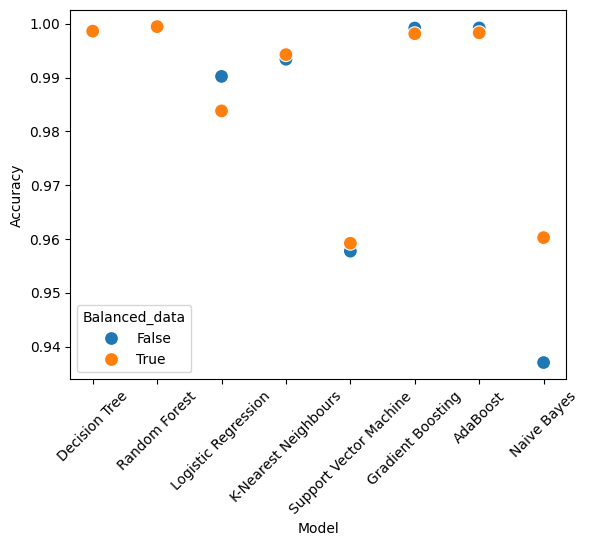

In [232]:
# Accuracy
sns.scatterplot(data=results, x='Model', y='Accuracy', hue='Balanced_data', s=100)
plt.xticks(rotation=45)
plt.show()

This chart visualizes the overall accuracy of the models on the dataset. **Decision Trees** and **Random Forest** performed the best on this metrics and they have very similar results for both datasets. On the other hand, **Support Vector Machine** performed the worst.

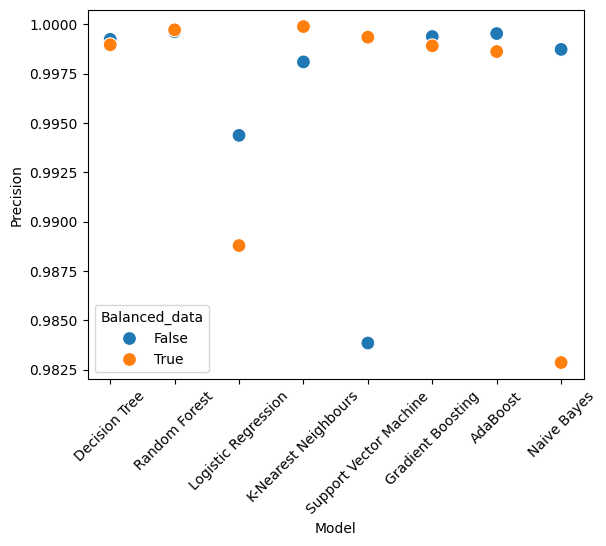

In [233]:
# Precision
sns.scatterplot(data=results, x='Model', y='Precision', hue='Balanced_data', s=100)
plt.xticks(rotation=45)
plt.show()

The precision scores are plotted here, and all models perform reasonably well, with **Logistic Regression** having the lower precision in both datasets. The balanced parameter appears to slightly improve precision for **Support Vector Machine** but has little effect on other models.

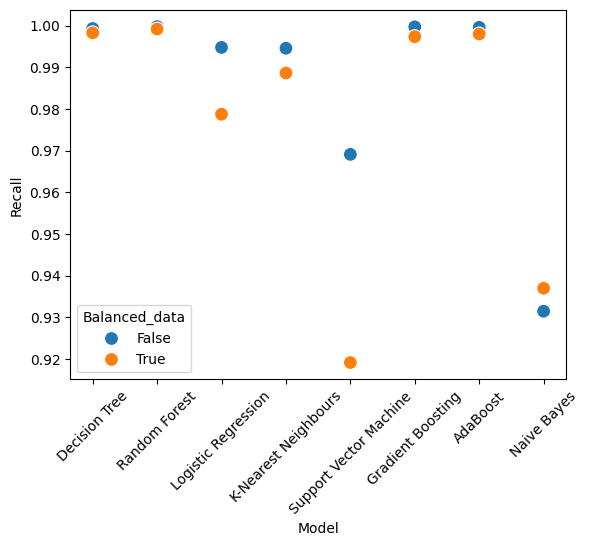

In [234]:
# Recall
sns.scatterplot(data=results, x='Model', y='Recall', hue='Balanced_data', s=100)
plt.xticks(rotation=45)
plt.show()

This plot displays the recall scores of the models. Most models achieve near-perfect recall, with **Support Vector Machine** as the worst model. The **balanced** dataset, overall, produces slightly lower results.

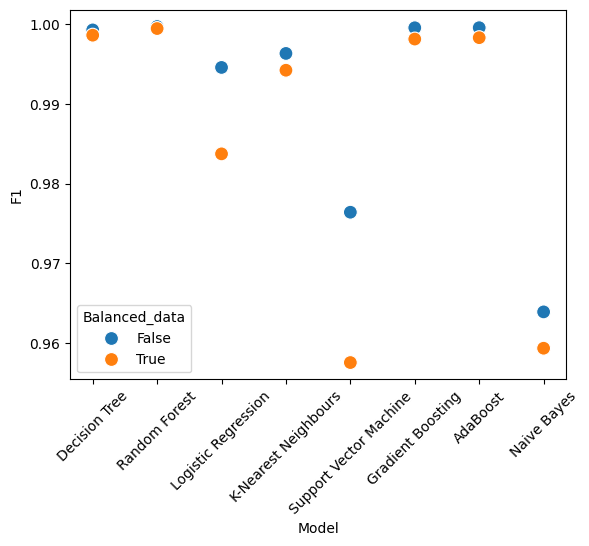

In [235]:
# F1-score
sns.scatterplot(data=results, x='Model', y='F1', hue='Balanced_data', s=100)
plt.xticks(rotation=45)
plt.show()

This plot shows the F1 scores of different models on the dataset. **Decision Trees** and **Random Forest** have the highest F1 scores, while **Support Vector Machine** has the lowest. The balanced dataset has a slight negative effect on the F1 scores of the models.

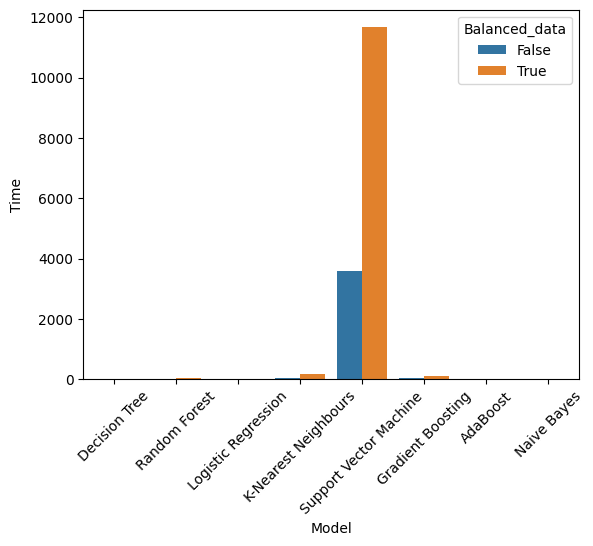

In [236]:
# Time
sns.barplot(data=results, x='Model', y='Time', hue='Balanced_data')
plt.xticks(rotation=45)
plt.show()

This chart compares the training times of different machine learning models on a dataset, with **Support Vector Machine** taking significantly longer than the other models.

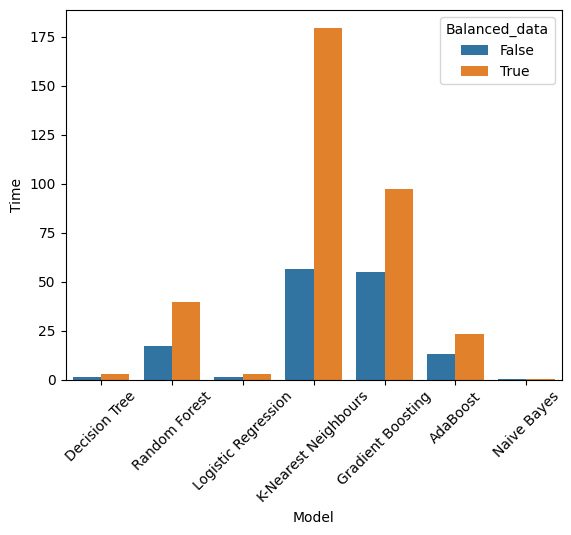

In [237]:
# Time without SVM
sns.barplot(data=results[results['Model'] != 'Support Vector Machine'], x='Model', y='Time', hue='Balanced_data')
plt.xticks(rotation=45)
plt.show()

**Decision Trees** and **Logistic Regression** are the fastest models to train (almost instantaneously), but **Random Forest** and **K-Nearest Neighbors** also perform in a reasonable amount of time.
The **balanced** dataset also appears to have a major impact on training time for some models.